<a href="https://colab.research.google.com/github/icakhoerunnisa/Tutorial_TensorFlow_Keras_DeepLearning/blob/main/Tugas_TensorFlow_Keras_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAHAP PERSIAPAN**

In [ ]:
# Mendefinisikan paths untuk file-file model
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

! pip install tensorflow==2.4.0rc0

import tensorflow as tf

# keras berguna untuk melakukan proses deep learning
from tensorflow import keras

# numpy merupakan library yang berfungsi untuk melakukan operasi matematika
import numpy as np

# pandas berguna untuk melakukan operasi manipulasi data
import pandas as pd

# matplotlib berguna untuk melakukan operasi penampilan data terhadap sebuah grafik
import matplotlib.pyplot as plt

# math merupakan library bawaan yang dimiliki python 
import math

# Menentukan benih untuk reproduktifitas percobaan
seed = 1
np.random.seed(seed)


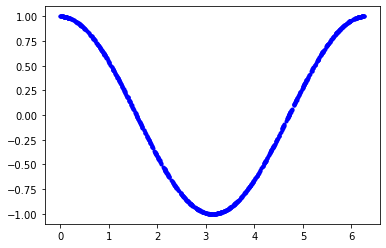

In [ ]:
# Menentukan jumlah data sampel yang akan digunakan
SAMPLES = 1000

# men-generate sekumpulan bilangan acak yang terdistribusi dari 0 hingga 2π, 
# yang mencakup osilasi gelombang cosinus lengkap
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Mengacak sampel bilangan yang sudah d generate tersebut agar tidak berurutan
np.random.shuffle(x_values)

# Menghitung nilai cosinus berdasakan data bilangan yang kita miliki
y_values = np.cos(x_values).astype(np.float32)

# Menampilkan hasil perhitungan cosinus ke dalam sebuah grafik
plt.plot(x_values, y_values, 'b.')
plt.show()

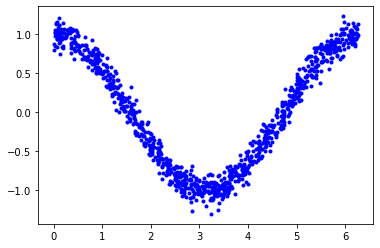

In [ ]:
# Menambahkan beberapa bilangan terhadap data sehingga data akan terlihat kotor 
# sehingga nanti memudahkan dalam membaca hasil prediksi
y_values += 0.1 * np.random.randn(*y_values.shape)

# Menampilkan hasil kedala sebuah grafik
plt.plot(x_values, y_values, 'b.')
plt.show()


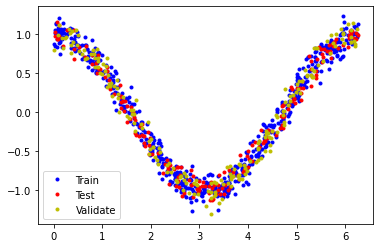

In [ ]:
# Membagi data sampel menjadi 60% data training, 20% data validasi, dan 20% data test
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Melakukan split data menjadi data training, validasi, dan test
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Mengecek apakah pembagian data tersebut sudah sesuai
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Menampilkan data kedalam sebuah grafik
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

**TAHAP PEMBUATAN MODEL**

In [ ]:
# Mendefinisikan model sequential untuk membangun arsitektur model deep learning
model_1 = tf.keras.Sequential()

# Membuat 3 lapis layer dengan 32 neuron dengan aktifasi relu
model_1.add(keras.layers.Dense(32, activation='relu', input_shape=(1,)))

model_1.add(keras.layers.Dense(32, activation='relu'))

model_1.add(keras.layers.Dense(32, activation='relu'))

# Membuat layer output dengan 1 neuron, karena hanya 1 output yang akan dihasilkan
model_1.add(keras.layers.Dense(1))

# Meng-compile model
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Menerapkan model yang telah kita buat dengan data sampel yang miliki
# dengan cara melatih model tersebut dengan data sampel yang dimiliki
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=100,
                        validation_data=(x_validate, y_validate))


Epoch 1/1000
6/6 [==============================] - 1s 86ms/step - loss: 0.8059 - mae: 0.7225 - val_loss: 0.5328 - val_mae: 0.6387
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5353 - mae: 0.6521 - val_loss: 0.5197 - val_mae: 0.6410
Epoch 3/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5498 - mae: 0.6594 - val_loss: 0.5314 - val_mae: 0.6442
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.5564 - mae: 0.6646 - val_loss: 0.5027 - val_mae: 0.6332
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.4996 - mae: 0.6330 - val_loss: 0.4966 - val_mae: 0.6280
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5156 - mae: 0.6418 - val_loss: 0.4957 - val_mae: 0.6258
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5060 - mae: 0.6351 - val_loss: 0.4857 - val_mae: 0.6203
Epoch 8/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.5044 - mae: 0

**TAHAP EVALUASI DAN PREDIKSI MODEL**

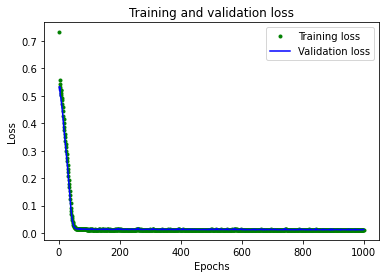

In [ ]:
# Menampilkan grafik berdasarkan hasil pelatihan model tersebut dari sisi Error
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

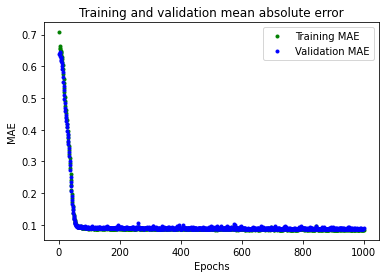

In [ ]:
plt.clf()

# Menampilkan grafik hasil pelatihan dari sisi Mean Absolute Error (MAE)
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
SKIP = 0

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0857


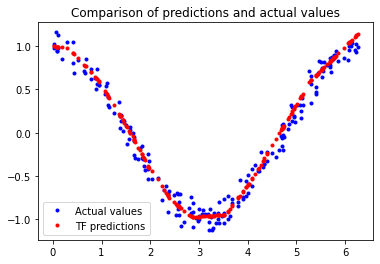

In [ ]:
# Mmenghitung dan menampilkan loss pada data test
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Melakukan uji coba prediksi terhadap model telah yang kita buat
y_test_pred = model_1.predict(x_test)

# Menampilkan grafik hasil prediksi
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()